# **Session 18: DNNs are not rubsut to rotation or shift of input images **


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

seed = 7
numpy.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


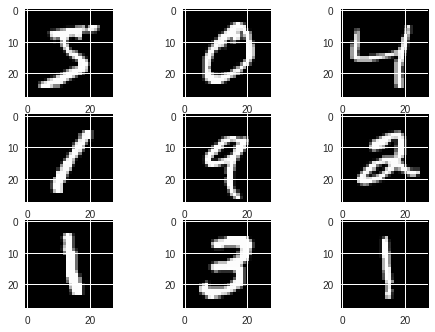

In [ ]:
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [ ]:
num_of_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_of_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_of_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [ ]:
my_model = Sequential()
my_model.add(Dense(100, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

performance_over_epochs_overfitting_model=my_model.fit(X_train, Y_train, epochs=15, batch_size=100, verbose=2)


Epoch 1/15
 - 4s - loss: 0.3590 - acc: 0.8995
Epoch 2/15
 - 3s - loss: 0.1695 - acc: 0.9514
Epoch 3/15
 - 3s - loss: 0.1233 - acc: 0.9651
Epoch 4/15
 - 3s - loss: 0.0967 - acc: 0.9719
Epoch 5/15
 - 3s - loss: 0.0789 - acc: 0.9778
Epoch 6/15
 - 3s - loss: 0.0657 - acc: 0.9813
Epoch 7/15
 - 3s - loss: 0.0562 - acc: 0.9836
Epoch 8/15
 - 3s - loss: 0.0473 - acc: 0.9867
Epoch 9/15
 - 3s - loss: 0.0405 - acc: 0.9884
Epoch 10/15
 - 3s - loss: 0.0348 - acc: 0.9903
Epoch 11/15
 - 3s - loss: 0.0301 - acc: 0.9916
Epoch 12/15
 - 3s - loss: 0.0261 - acc: 0.9929
Epoch 13/15
 - 3s - loss: 0.0227 - acc: 0.9938
Epoch 14/15
 - 3s - loss: 0.0196 - acc: 0.9952
Epoch 15/15
 - 3s - loss: 0.0164 - acc: 0.9962


## Rotation

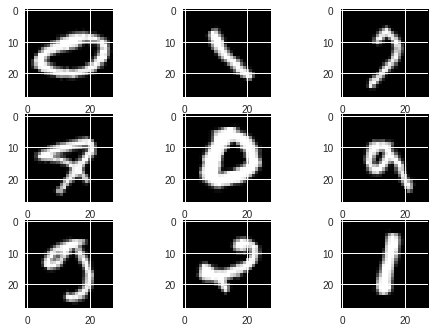

In [ ]:

	
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(rotation_range=45)#   <======== Change roataion value here
datagen.fit(X_test)


for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=1000):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

  
  
  

	

In [ ]:
X_batch = X_batch.reshape(y_batch.shape[0], num_of_pixels).astype('float32')
X_batch = X_batch / 255
y_batch = np_utils.to_categorical(y_batch)




In [ ]:
scores = my_model.evaluate(X_batch, y_batch, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 78.50%


## Translation (shifting) of input images

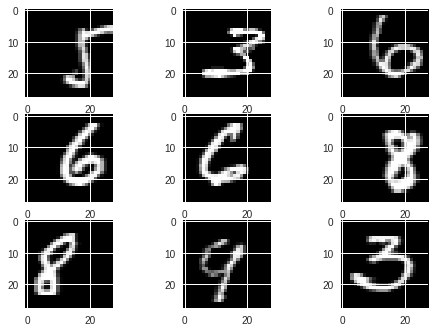

In [ ]:

	
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0)#   <======== Change shift value here
datagen.fit(X_test)


for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=1000):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

  
  
  

	

In [ ]:
X_batch = X_batch.reshape(y_batch.shape[0], num_of_pixels).astype('float32')
X_batch = X_batch / 255
y_batch = np_utils.to_categorical(y_batch)




In [ ]:
scores = my_model.evaluate(X_batch, y_batch, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 66.30%
